In [1]:
# Find some flares from the SSW latest events database on hek
# Can also find the at https://www.lmsal.com/solarsoft/latest_events/
# 
# 07-Feb-2023 IGH


In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from sunpy.net import Fido
from sunpy.net import attrs as a
from astropy.time import Time
import astropy.units as u
from astropy.coordinates import SkyCoord

import sunpy.map
from sunpy.coordinates import frames
matplotlib.rcParams['font.size']=16

In [3]:
trange=a.Time("2021-07-20 00:00","2021-07-20 15:00")

res = Fido.search(trange,a.hek.EventType("FL"),a.hek.FRM.Name == "SSW Latest Events")

hekres = res["hek"]
# display(hekres)

In [4]:
# Just extract out the bits we might need
shrt_res = hekres["event_starttime", "event_peaktime",
                        "event_endtime", "fl_goescls", "hpc_x", "hpc_y", "ar_noaanum","hgc_x", "hgc_y", "frm_name"]
shrt_res

event_starttime,event_peaktime,event_endtime,fl_goescls,hpc_x,hpc_y,ar_noaanum,hgc_x,hgc_y,frm_name
Time,Time,Time,str4,float64,float64,int64,float64,int64,str17
2021-07-20 05:12:00.000,2021-07-20 05:25:00.000,2021-07-20 05:42:00.000,B3.3,-319.55229,-705.411,2844,129.08934,-44,SSW Latest Events
2021-07-20 13:45:00.000,2021-07-20 13:51:00.000,2021-07-20 13:58:00.000,B5.0,-911.1021,-246.093768,0,64.37584,-15,SSW Latest Events


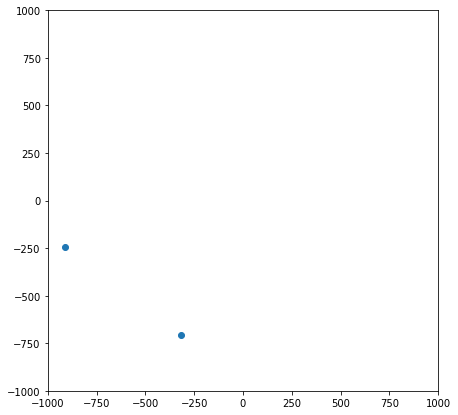

In [5]:
fig = plt.subplots(figsize=(7, 7))
plt.scatter(shrt_res['hpc_x'],shrt_res['hpc_y'])
plt.xlim([-1000,1000])
plt.ylim([-1000,1000])
plt.show()

In [6]:
# Now let's try to be fancy and put ontop of a blank sunpy map

In [7]:
data = np.full((10, 10), np.nan)
skycoord = SkyCoord(0*u.arcsec, 0*u.arcsec, obstime='2021-07-20',
                    observer='earth', frame=frames.Helioprojective)
header = sunpy.map.make_fitswcs_header(data, skycoord, scale=[220, 220]*u.arcsec/u.pixel)

blank_map = sunpy.map.Map(data, header)
coords = SkyCoord(shrt_res['hpc_x']*u.arcsec, shrt_res['hpc_y']*u.arcsec, frame=blank_map.coordinate_frame)

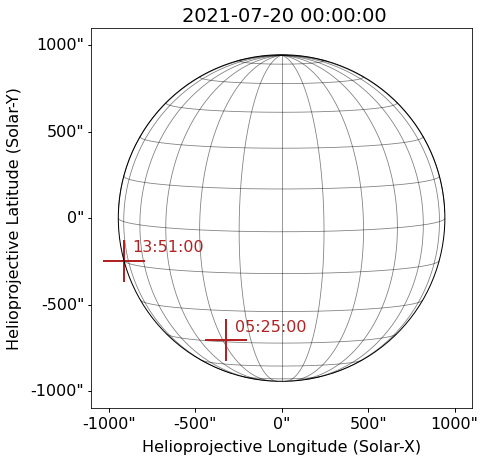

In [10]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection=blank_map)
blank_map.plot(axes=ax)
blank_map.draw_limb(axes=ax, color="k")
blank_map.draw_grid(axes=ax, color="k")
p = ax.plot_coord(coords, '+',color='firebrick',mew=2,ms=42)
for i in range(len(shrt_res['hpc_x'])):
    ax.text(((50+shrt_res['hpc_x'][i])*u.arcsec).to('deg').value,
            ((50+shrt_res['hpc_y'][i])*u.arcsec).to('deg').value,
            shrt_res['event_peaktime'][i].isot[11:19],
            transform=ax.get_transform('world'),color='firebrick')
plt.rcParams['font.size']=16
plt.show()